Additive Recurrence Sequence
=======

# Theory
A classic example, which illustrates the working principle of Uniform quasi-random number generators, is the **Additive Recurrence Sequence (ARS)**.

## Definition
ARS uses a recurrence relation to compute the sequence of random number realization. 
$$
\begin{equation}
u_{i+1} = (u_i + \alpha) \mod{1} \qquad i = 1,2,3,\dots
\end{equation}$$

With $\alpha$ being irrational number. $\alpha$ is considered degree of freedom to control the discrepancy of the generated sequence. A good value of $\alpha$ gives lower discrepancy. The following are good choice choices of $\alpha$ 
$$\alpha = \sqrt{2} - 1 \quad \text{or} \quad \frac{\sqrt{5} - 1}{2}$$

For multi-dimensional applications, independent sequences can be generated by changing $\alpha$ used to generate each sequence. A convenient set of values of $\alpha$ that are used, is the square roots of primes numbers from two and up
$$\alpha = \sqrt{2},\; \sqrt{3},\; \sqrt{5},\; \sqrt{7},\; \sqrt{11},\; \dots $$


## Examples
Let the  $u_0 = 0.56$, $\alpha=\sqrt{2} - 1$. The first realization of the uniform variable would be the following:
$$
\begin{align*}
u_1 &= (0.56 + \sqrt{2} - 1) \mod{1} = 0.974213562\dots \\
\end{align*}$$

# Implementation
Our representation of sequence of random variable realizations will be through the use of numpy vector that holds in each row a realization

$$
\begin{bmatrix}
    u_1     \\
            \\
    \vdots  \\
            \\
    u_N     \\      
\end{bmatrix}
$$

$
\text{where} \\
\begin{array}{l l}
    \qquad u &: \text{Realization of the random variable}\\
    \qquad N &: \text{Sequence length}
\end{array}
$

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Parameters

In [2]:
N = 50     
u_0 = 0.56
a = np.sqrt(2) - 1
alpha = 0.05    # significance level "for statistical testing"

In [15]:
# desired distribution info
mean, var, skew, kurt = stats.uniform.stats(moments='mvsk')
CFD = lambda x : x

## Algorithm

```mermaid
    flowchart LR
        u_0(Set u_0) --> u_i(Compute u_i)
        u_i --> |N times| u_i
        u_i --> return(Return sequence)
```

In [4]:
def ARS(N: int, u_0: float, a: float = np.sqrt(2) - 1) -> np.ndarray:
    '''
    Sample uniformly distributed random variable using a quasi-random number 
    generator built by Additive Recurrence Sequence (ARS)

    Args:
        N: Length of the sequence of realizations of the random variable
        u_0: Initial realization of the random number, has to be in `[0,1)`
        a: Method param, has to be irrational number

    Returns:
        u: Random variable realizations
    '''
    
    u = np.zeros(N)
    u[0] = (u_0 + a) % 1

    for i in range(N-1):
        u[i+1] = (u[i] + a) % 1

    return u

## Analysis & Postprocessing
This section include visualization and performance metrics of the generated sequence of the random variable.

### Uniformity Analysis 
These visualizations and tests are preformed to investigate the goodness-of-fit of the generated sequence to the uniform distribution.
- Histogram: *Sequence distribution investigation*
- CDF: *Sequence distribution investigation*
- Q-Q Plot: *Sequence quantiles against theoretical uniform quantiles*
- Kolmogorov-Smirnov Test: *Compare the generated sequence distribution with the reference "uniform" distribution*
- Chi-Square Test: *Compare the generated sequence frequencies with the it average frequency being uniformly distributed*

> Both tests are based on the null hypothesis testing approach to measure the goodness-of-fit test of the generated sequence to uniform distribution. The null hypothesis assume that the generated sequence distribution **do not different** from the uniform distribution.


In [5]:
# uniform distribution CFD
CFD = lambda x : x
x = np.linspace(0, 1)

# generating realization sequence
u = ARS(N, u_0)

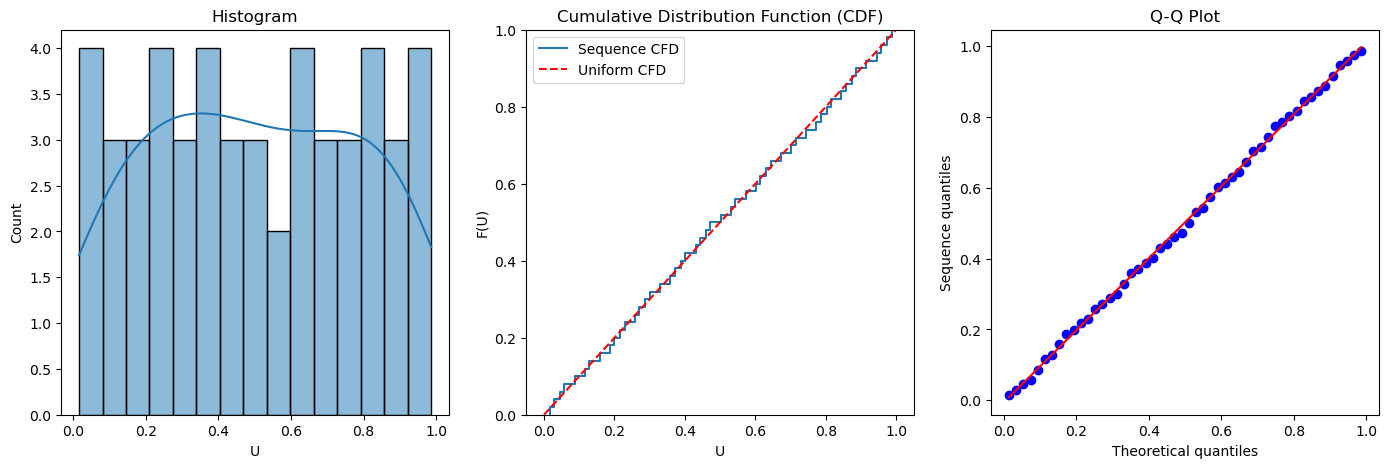

,Test,Test Statistic,P-value,null hypothesis,Remarks
0,kolmogorov-smirnov,0.033203,1.000000,accepted,The sequence is uniformly distributed
1,chi-square,1.600000,0.999979,accepted,The sequence is uniformly distributed


In [6]:
fig, ax = plt.subplots(1,3, figsize=(17,5))

# histogram
sns.histplot(u, stat="count", kde=True, bins=15, ax=ax[0])
ax[0].set(xlabel="U", title="Histogram")

# cdf
sns.ecdfplot(x=u, ax=ax[1], label="Sequence CFD")
ax[1].plot(x, CFD(x), "r--", label="Uniform CFD")
ax[1].set(xlabel="U", ylabel="F(U)", title="Cumulative Distribution Function (CDF)")
ax[1].legend()

# q-q plot
stats.probplot(u, dist='uniform', plot=ax[2])
ax[2].set(ylabel="Sequence quantiles", title="Q-Q Plot")

# kolmogorov-smirnov
ks_statistic, ks_p_value = stats.kstest(u, cdf= "uniform")

# chi-square
observed_frequencies, _ = np.histogram(u, bins=15)
average_frequency = np.sum(observed_frequencies) / len(observed_frequencies)
expected_frequencies = np.repeat([average_frequency], repeats=len(observed_frequencies))
chi_statistic, chi_p_value = stats.chisquare(observed_frequencies, expected_frequencies)

# summary
summary = [
    ("kolmogorov-smirnov", ks_statistic , ks_p_value),
    ("chi-square", chi_statistic, chi_p_value)
    ]

df = pd.DataFrame(data=summary, columns=["Test", "Test Statistic", "P-value"])
df["null hypothesis"] = np.where(df['P-value'] >= alpha, "accepted", "rejected")
df["Remarks"] = np.where(df['P-value'] >= alpha, "The sequence is uniformly distributed", "The sequence is not uniformly distributed")

plt.show()
df

### Periodicity and Pattern Analysis
This investigation looks for patterns and trends in generator behavior. The investigation is carried in many directions, one by generating two independent sequences to **study the behavior of the generator in higher dimensions**. The other direction is generating single sequence to **study behavior generator in single dimension**.
- Scatter Plot: *Generator discrepancy analysis*
- AutoCorrelation Test: *Check the dependance between realizations in the sequence*

> Generating two independent sequences is obtained by changing method parameter $a$ of the second sequence form the first sequence.

In [29]:
# generate two independent sequences
u_1 = ARS(100, u_0, a)
u_2 = ARS(100, u_0, a=(np.sqrt(5)-1)/2)

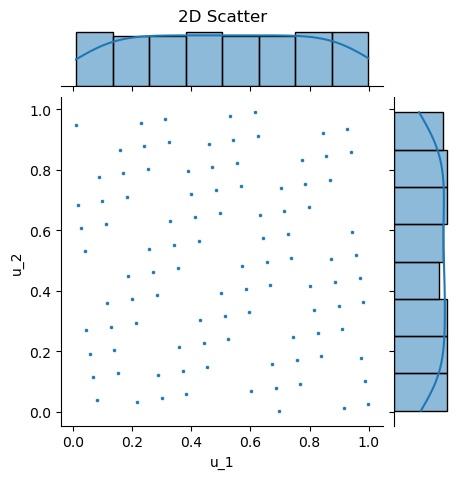

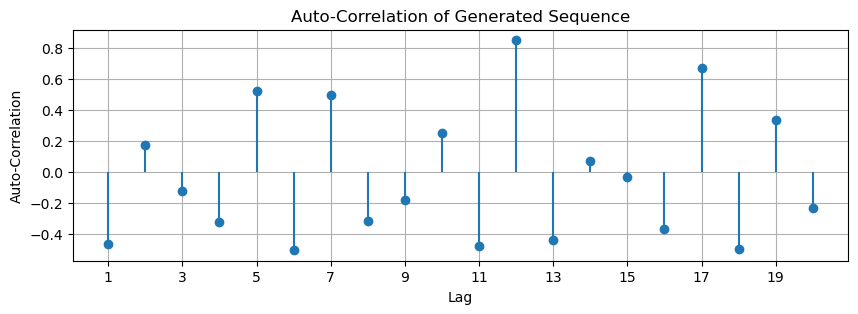

,Property,Quantity
0,strongest correlation,0.849248


In [30]:
# scatter
scatter = sns.jointplot(x=u_1, y=u_2, height=4.5, marker=".", marginal_kws={"kde": True})
scatter.ax_joint.set(xlabel="u_1", ylabel="u_2")
scatter.ax_marg_x.set(title="2D Scatter")

# autocorrelation
autocorrelation_function = [pd.Series(u).autocorr(lag=lag) for lag in range(1,21)]
fig, ax = plt.subplots(1,1, figsize=(10, 3))
ax.stem(range(1,21), autocorrelation_function, basefmt=" ")
ax.set(xlabel='Lag', ylabel='Auto-Correlation', title='Auto-Correlation of Generated Sequence', xticks=range(1,21,2)) 
ax.grid(True)

# summary
summary = [
    ("strongest correlation",   np.nanmax(np.abs(autocorrelation_function)))
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df

### Convergence Analysis
In this section we will investigate how fast the random number generator converge to the desired distribution. This will be done by tracing the absolute error, between the generator statistical properties and the expected properties; as the sample size $N$ "i.e. the sequence length" increases. The properties that we will investigate are the following
- CFD Convergence Plot: Investigate the convergence of the generator cfd to the desired distribution cfd.
- Parameters Convergence Plot: Investigate the convergence of the generator distribution parameters to the desired distribution parameters.

#### cfd convergence
How fast a generated sequence from the generator converge to the desired distribution cfd?

In [9]:
# sequence lengths
Ns_cfd = np.linspace(5, 1000, num=200, dtype=int)

# points
n = 20                  
x = np.linspace(0, 1, n)

cfd_errors = np.zeros(len(Ns_cfd))
for i, N in enumerate(Ns_cfd):
    # sequence
    u_rng = ARS(N, u_0=0.45)

    # rng cfd
    pdf_rng, _ = np.histogram(u_rng, bins=n)
    cumulative_sum = np.cumsum(pdf_rng)
    cdf_rng = cumulative_sum/cumulative_sum[-1]

    cfd_errors[i] = np.sum(abs(CFD(x) - cdf_rng))

#### parameters convergence
How fast a generated sequence from the generator converge to the desired distribution parameters? 

We answer it by tracing the error between the expected parameters, from the desired distribution; and the sequence parameters as $N$ increases. However, such answer produce fluctuations of order $10^{-2}$ around some mean value for a some parameters as $N$ increases. Hence this disrupt the visualization and spotting the trends of convergence. 
>These fluctuations prevail since we talk about error "i.e. small magnitude" and jumping around mean value by order of $10^{-2}$, which expected from random process; is considered as wild fluctuations in such scale.

To mitigate this, we can take the averaged value of the parameter for many independent sequence for each $N$. This is done by generating many independent sequences "produced by $n$ runs", at some given $N$; and calculate the parameter for each sequence and average its value. Repeating this process for all $N$. This will reduce the wild fluctuations. Here is flow chart to better visual explanation

```mermaid
    flowchart LR
        subgraph Loop over N
            direction LR
            N(Given Sequence Length N) --> nSequences
            
            subgraph nSequences
                direction TB
                s1(Compute Independent Sequence 1 \nand calculate its Parameter) --> s2
                s2(Compute Independent Sequence 2 \nand calculate its Parameter) --> s
                s(:) --> sn
                sn(Compute Independent Sequence n  \nand calculate it Parameter)
            end

            nSequences --> mean(Compute Parameter Average)
        end

        style nSequences fill:#DCDCDC,stroke:#333,stroke-width:4px
```

In [17]:
# sequence lengths
Ns_param = np.linspace(5, 10000, num=200, dtype=int)

# runs to average parameters over to reduce the wild fluctuations 
runs=30

param_errors = np.zeros((len(Ns_param), 4))
for i, N in enumerate(Ns_param):
    for run in range(runs):
        # sequence
        a_i = np.random.choice([(np.sqrt(5) - 1)/2, np.sqrt(2) - 1, np.sqrt(7), np.sqrt(11)])
        u_rng = ARS(N, u_0=np.random.uniform(0,1), a= a_i)

        # errors in parameters
        param_errors[i, 0] += abs(mean - np.mean(u_rng))
        param_errors[i, 1] += abs(var - np.var(u_rng))
        param_errors[i, 2] += abs(skew - stats.skew(u_rng))
        param_errors[i, 3] += abs(kurt - stats.kurtosis(u_rng))
    
    param_errors[i, :] = param_errors[i, :]/runs

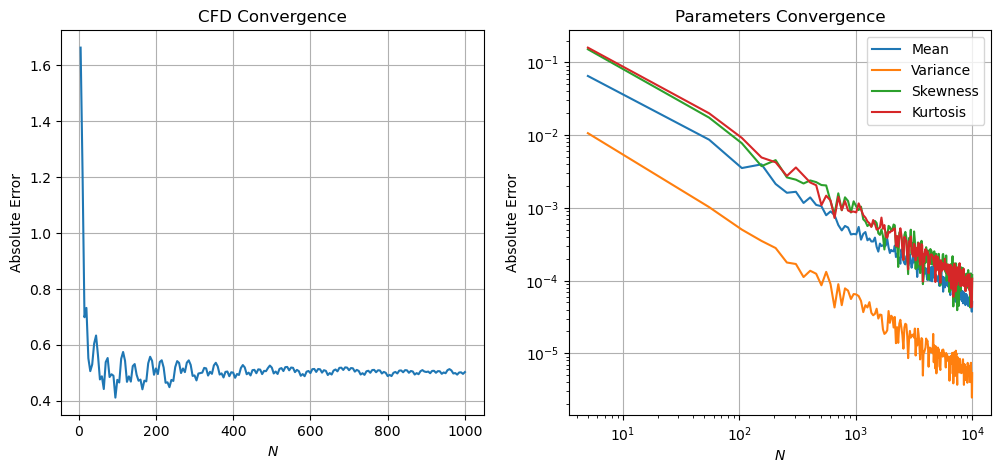

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

# cdf error
ax[0].plot(Ns_cfd, cfd_errors, label="CFD Error")
ax[0].set(xlabel=r"$N$", ylabel="Absolute Error", title="CFD Convergence")
ax[0].grid(True)

# parameters errors
ax[1].plot(Ns_param, param_errors[:,0], label="Mean")
ax[1].plot(Ns_param, param_errors[:,1], label="Variance")
ax[1].plot(Ns_param, param_errors[:,2], label="Skewness")
ax[1].plot(Ns_param, param_errors[:,3], label="Kurtosis")
ax[1].set(xscale="log", yscale="log", xlabel=r"$N$", ylabel="Absolute Error", title="Parameters Convergence")
ax[1].grid(True)
ax[1].legend()

plt.show()

We can see that the generated sequence from **Additive Recurrence Sequence (ARS)** started to converge to uniform CFD after $N \approx 400$.